In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install tensorflow tensorflow.gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM error by setting up GPU consumption

gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)


In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
import cv2
import imghdr

In [7]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/COVID-19_Radiography_Dataset'

In [8]:
image_ext = ['jpeg','jpg','bmp','png']

In [9]:
for ic in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, ic)):
    image_path=os.path.join(data_dir, ic, image)

    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)

      if tip not in image_ext:
        print("Image is not of desired extension",format(image_path))
        os.remove(image_path)


    except Exception as e:
      print("issue with the image")
      #os.remove(image_path)

issue with the image
issue with the image
issue with the image
issue with the image
issue with the image
issue with the image
issue with the image
issue with the image


In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/COVID-19_Radiography_Dataset')

Found 42400 files belonging to 4 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

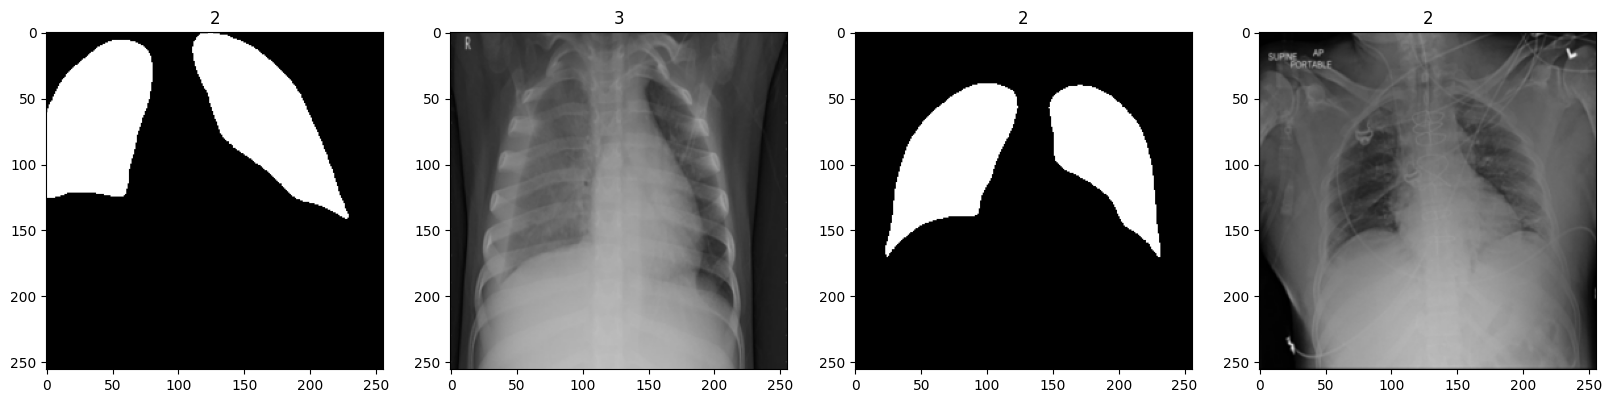

In [14]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [15]:
data = data.map(lambda x,y:(x/255,y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[4.6109068e-03, 4.6109068e-03, 4.6109068e-03],
          [2.2879902e-01, 2.2879902e-01, 2.2879902e-01],
          [7.1051621e-01, 7.1051621e-01, 7.1051621e-01],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
 
         [[4.6109068e-03, 4.6109068e-03, 4.6109068e-03],
          [2.2879902e-01, 2.2879902e-01, 2.2879902e-01],
          [7.1051621e-01, 7.1051621e-01, 7.1051621e-01],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
 
         [[4.7492082e-03, 4.7492082e-03, 4.7492082e-03],
          [2.3003086e-01, 2.3003086e-01, 2.3003086e-01],
          [7.0913327e-01, 7.0913327e-01, 7.0913327e-01],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+

In [17]:
train_size = int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)

In [18]:
train = data.take(train_size)
test = data.skip(train_size).take(test_size)
val = data.skip(train_size+test_size).take(val_size)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
from keras.api._v2.keras import activations


In [22]:
from posix import access
model.add(Conv2D(16,(3,3),1, activation= 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [28]:
if not os.path.exists(data_dir+"train_test_split/"):

  os.makedirs(data_dir+"train_test_split/")

  os.makedirs(data_dir+"train_test_split/train/Normal")
  os.makedirs(data_dir+"train_test_split/train/Covid")

  os.makedirs(data_dir+"train_test_split/test/Normal")
  os.makedirs(data_dir+"train_test_split/test/Covid")

  os.makedirs(data_dir+"train_test_split/validation/Normal")
  os.makedirs(data_dir+"train_test_split/validation/Covid")


  # Train Data
  for i in np.random.choice(replace= False , size= 3000 , a = glob.glob(data_dir+imgs[0]+"*") ):
    shutil.copy(i , data_dir+"train_test_split/train/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 3900 , a = glob.glob(data_dir+imgs[2]+"*") ):
    shutil.copy(i , data_dir+"train_test_split/train/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 900 , a = glob.glob(data_dir+imgs[3]+"*") ):
    shutil.copy(i , data_dir+"train_test_split/train/Covid" )
    os.remove(i)

  # Validation Data
  for i in np.random.choice(replace= False , size= 308 , a = glob.glob(data_dir+imgs[0]+"*") ):
    shutil.copy(i , data+"train_test_split/validation/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 500 , a = glob.glob(data_dir+imgs[2]+"*") ):
    shutil.copy(i , data_dir+"train_test_split/validation/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 200 , a = glob.glob(data_dir+imgs[3]+"*") ):
    shutil.copy(i , data_dir+"train_test_split/validation/Covid" )
    os.remove(i)

  # Test Data
  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(data_dir+imgs[0]+"*") ):
    shutil.copy(i , data_dir+"train_test_split/test/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(data_dir+imgs[2]+"*") ):
    shutil.copy(i , data_dir+"train_test_split/test/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 200 , a = glob.glob(data_dir+imgs[3]+"*") ):
    shutil.copy(i , data_dir+"train_test_split/test/Covid" )
    os.remove(i)



In [27]:
import os

if not os.path.exists(data_dir + "train_test_split/"):
    os.makedirs(data_dir + "train_test_split/")

if not os.path.exists(data_dir + "train_test_split/train/Normal"):
    os.makedirs(data_dir + "train_test_split/train/Normal")


In [29]:
train_path  = "/content/all_images/train_test_split/train"
valid_path  = "/content/all_images/train_test_split/validation"
test_path   = "/content/all_images/train_test_split/test"

In [30]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input, ResNet50
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras

In [53]:
train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input,
                                    zoom_range= 0.2,
                                    horizontal_flip= True,
                                    shear_range= 0.2,

                                    )

train = train_data_gen.flow_from_directory(directory= "/content/drive/MyDrive/Colab Notebooks/COVID-19_Radiography_Dataset/COVID",
                                           target_size=(224,224))

Found 7252 images belonging to 2 classes.


In [38]:
import os

# Define the directory path
train_dir = '/content/all_images/train_test_split/train'

if not os.path.exists(train_dir):
    os.makedirs(train_dir)

In [55]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras

In [56]:

validation_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , rescale= 1./255 )
valid = validation_data_gen.flow_from_directory(directory= "/content/drive/MyDrive/Colab Notebooks/COVID-19_Radiography_Dataset/Lung_Opacity" , target_size=(224,224))


Found 12034 images belonging to 2 classes.


In [57]:
test_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input, rescale= 1./255 )
test = train_data_gen.flow_from_directory(directory= "/content/drive/MyDrive/Colab Notebooks/COVID-19_Radiography_Dataset/Normal" , target_size=(224,224), shuffle= False)

Found 20424 images belonging to 2 classes.


In [58]:

train.class_indices

{'images': 0, 'masks': 1}

In [59]:

class_type = {0:'Covid',  1 : 'Normal'}

In [60]:
t_img , label = train.next()

In [61]:

def plotImages(img_arr, label):

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

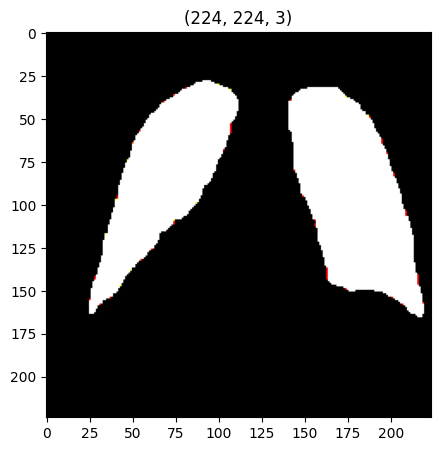

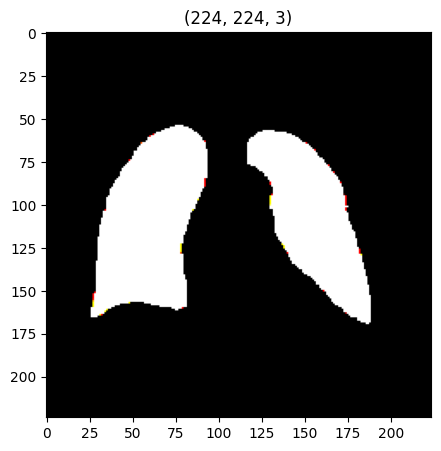

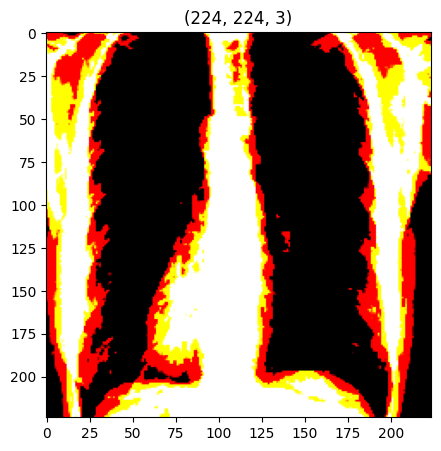

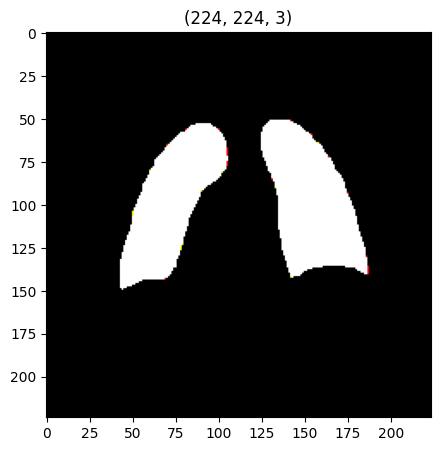

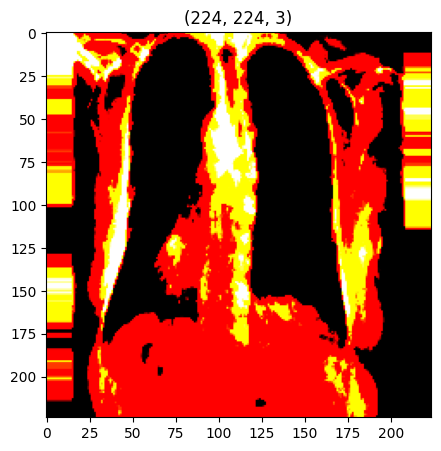

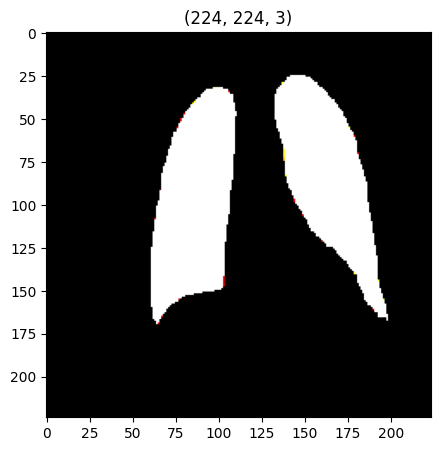

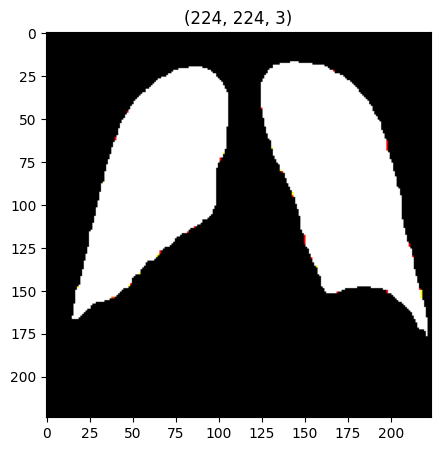

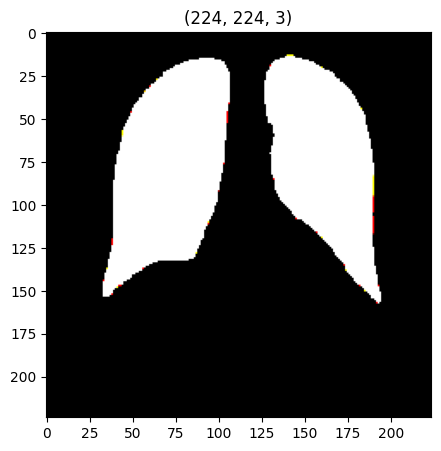

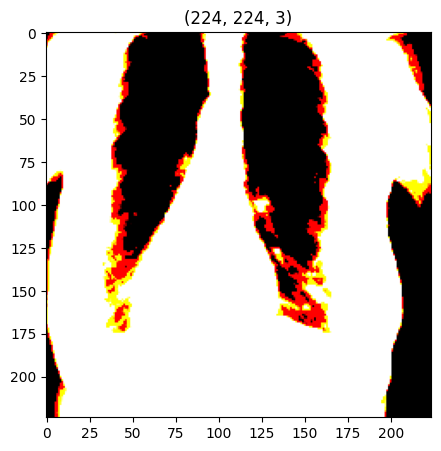

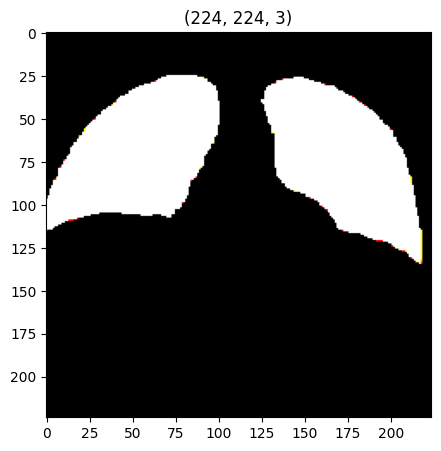

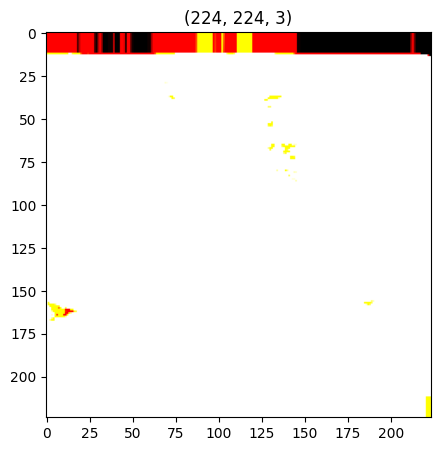

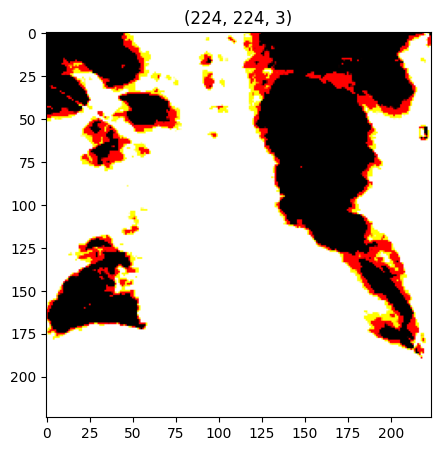

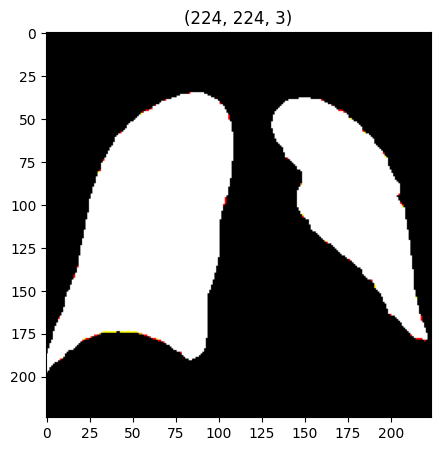

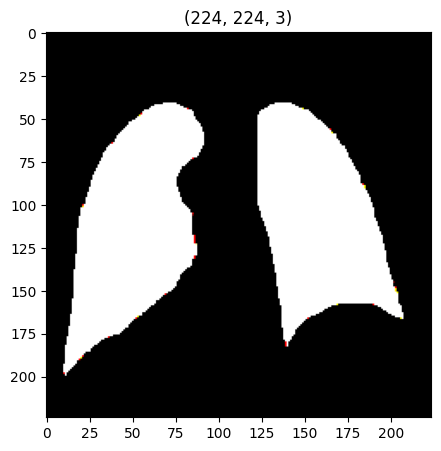

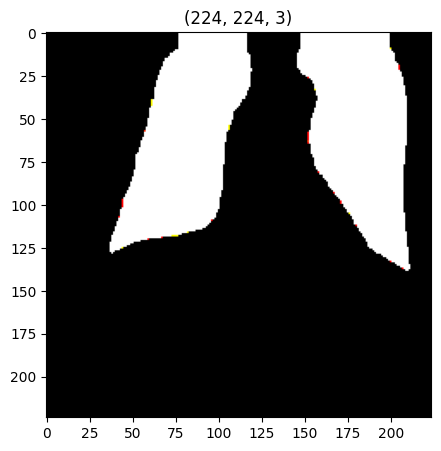

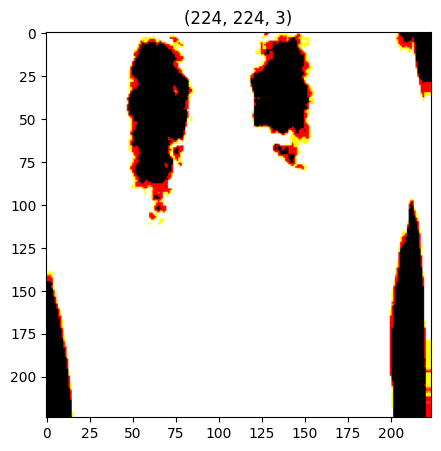

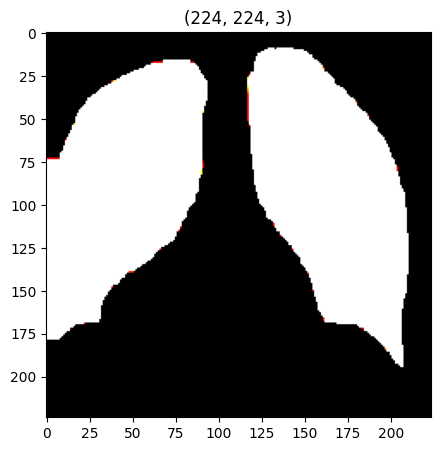

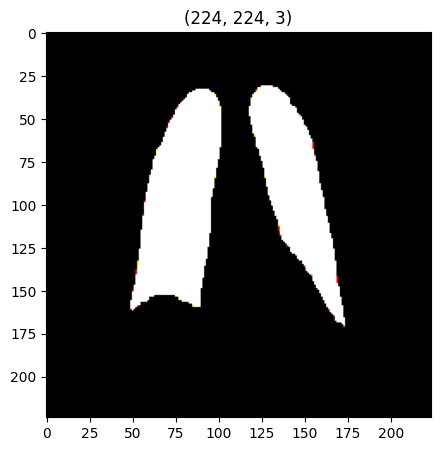

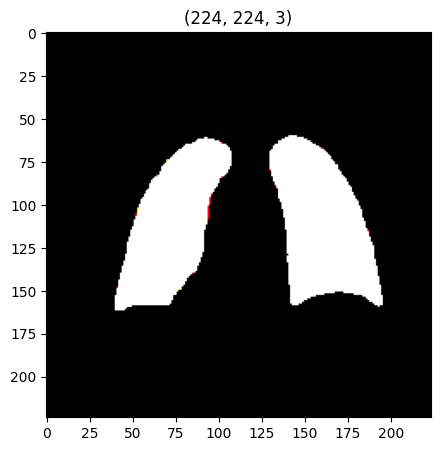

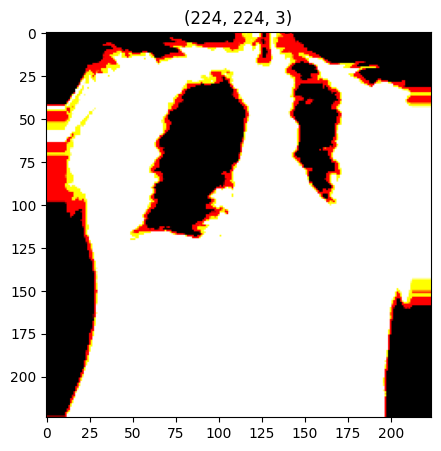

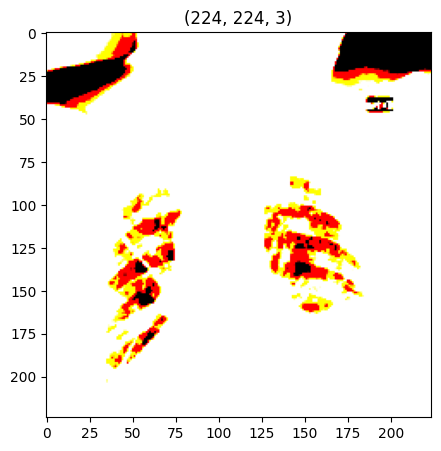

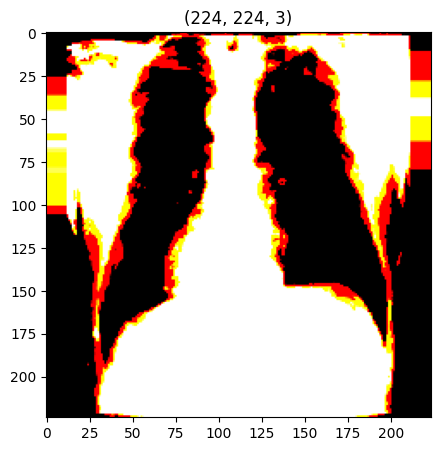

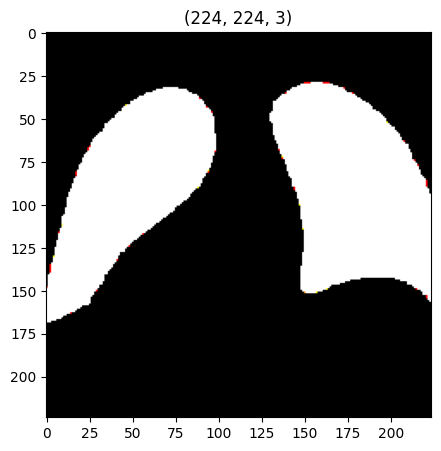

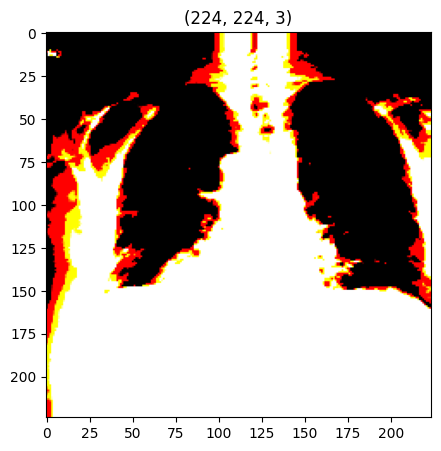

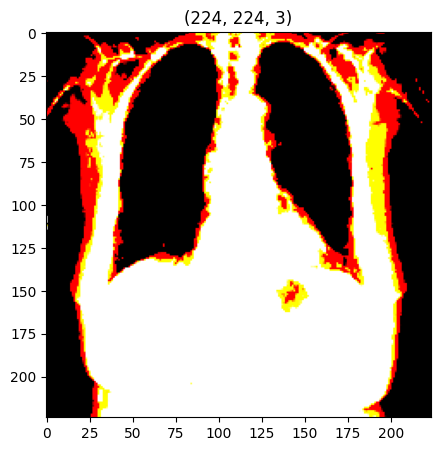

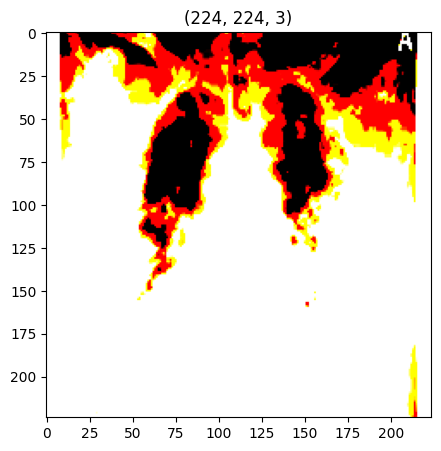

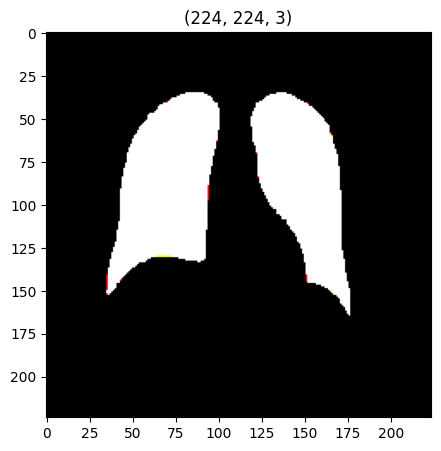

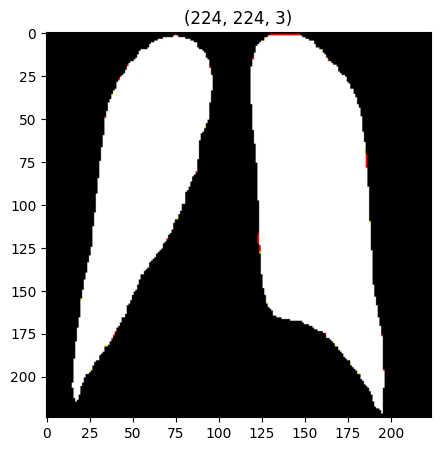

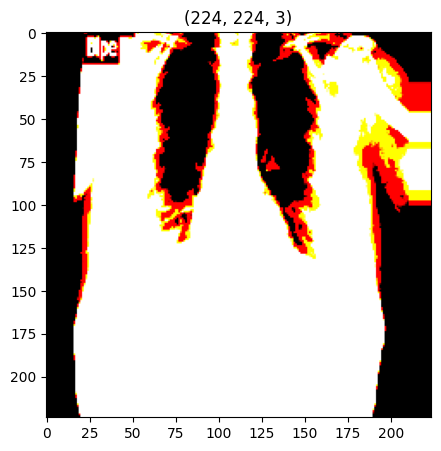

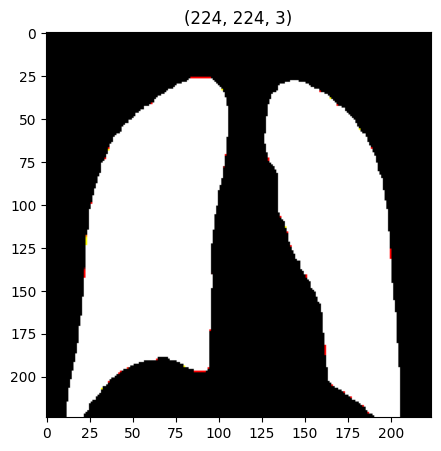

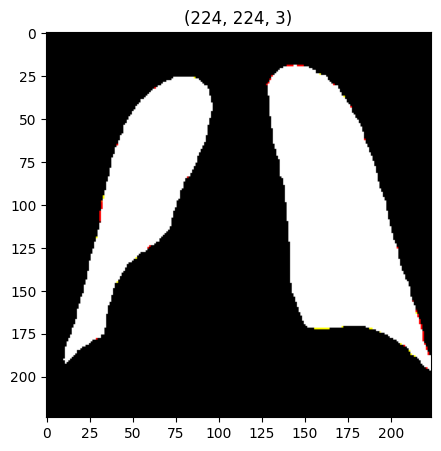

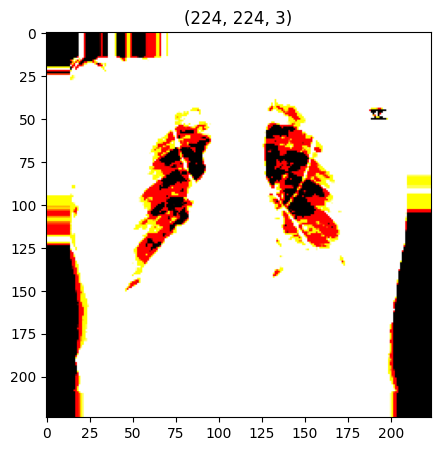

In [62]:
plotImages(t_img, label)

In [63]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [64]:
vgg = VGG16( input_shape=(224,224,3), include_top= False) # include_top will consider the new weights

58889256/58889256 [==============================] - 0s 0us/step


In [66]:
for layer in vgg.layers:
  layer.trainable = False

In [67]:
x = Flatten()(vgg.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

model = Model(vgg.input, x)

In [68]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [69]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [70]:
# implementing early stopping and model check point

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [72]:
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 10, validation_data= valid , validation_steps= 32)

<ipython-input-72-7bb8a546c5c9>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 10, validation_data= valid , validation_steps= 32)


Epoch 1/10
10/10 [==============================] - 772s 82s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.4392 - val_accuracy: 0.5098
Epoch 2/10
10/10 [==============================] - 809s 87s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.6212 - val_accuracy: 0.4922
Epoch 3/10
10/10 [==============================] - 809s 87s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.7154 - val_accuracy: 0.4912
Epoch 4/10
10/10 [==============================] - 743s 80s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.5744 - val_accuracy: 0.5156
Epoch 5/10
10/10 [==============================] - 809s 87s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.6909 - val_accuracy: 0.4990
Epoch 6/10
10/10 [==============================] - 750s 80s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.7261 - val_accuracy: 0.4941
Epoch 7/10
10/10 [==============================] - 808s 87s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.6822 -

In [83]:
h = hist.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [45]:
# Covid +ve X-Ray is represented by 0 and Normal is represented by 1

class_type = {0:'Covid',  1 : 'Normal'}

In [46]:

t_img , label = train.next()

In [47]:
# function when called will prot the images

def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()


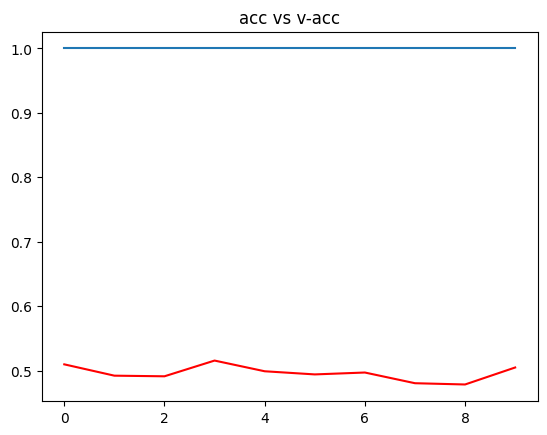

In [84]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

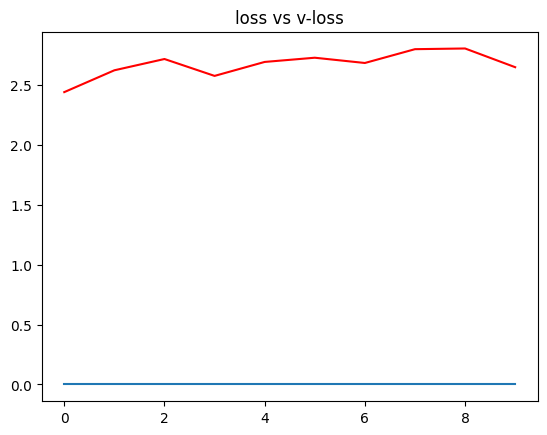

In [85]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [88]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img , axis= 0 )

  return img

1/1 [==============================] - 1s 757ms/step
The given X-Ray image is of type = Covid

1/1 [==============================] - 0s 476ms/step
The chances of image being Covid is : 99.97366666793823 percent

1/1 [==============================] - 0s 493ms/step
The chances of image being Normal is : 0.012136481382185593 percent


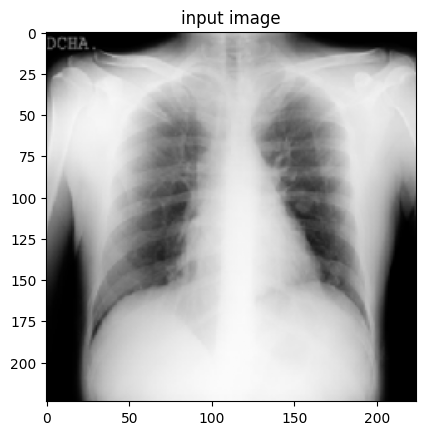

In [90]:

path = "/content/drive/MyDrive/Colab Notebooks/COVID-19_Radiography_Dataset/COVID/images/COVID-1000.png"       # you can add any image path

img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")

# to display the image
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()

In [91]:
import tensorflow as tf

In [121]:
# this function is used to generate the heat map of aan image


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):

    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    
    grads = tape.gradient(class_channel, last_conv_layer_output)

    
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [93]:
import matplotlib.cm as cm

from IPython.display import Image, display

In [94]:
# put the heatmap to our image to understand the area of interest

def save_and_display_gradcam(img_path , heatmap, cam_path="cam.jpg", alpha=0.4):
    """
    img input shoud not be expanded
    """

    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)


    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

In [95]:


def image_prediction_and_visualization(path,last_conv_layer_name = "block5_conv3", model = model):
  """
  input:  is the image path, name of last convolution layer , model name
  output : returs the predictions and the area that is effected
  """



  img_array = get_img_array(path)

  heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

  img = get_img_array(path)

  res = class_type[np.argmax(model.predict(img))]
  print(f"The given X-Ray image is of type = {res}")
  print()
  print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} %")
  print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} %")

  print()
  print("image with heatmap representing the covid spot")

  # function call
  save_and_display_gradcam(path, heatmap)

  print()
  print("the original input image")
  print()

  a = plt.imread(path)
  plt.imshow(a, cmap = "gray")
  plt.title("Original image")
  plt.show()

1/1 [==============================] - 1s 1s/step
The given X-Ray image is of type = Covid

1/1 [==============================] - 2s 2s/step
The chances of image being Covid is : 99.9941349029541 %
1/1 [==============================] - 2s 2s/step
The chances of image being Normal is : 0.004148518564761616 %

image with heatmap representing the covid spot


<ipython-input-94-56e15eb10eb0>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


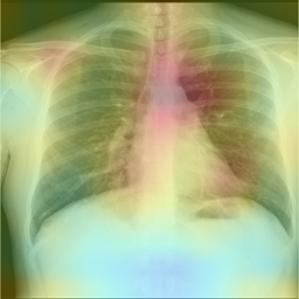


the original input image



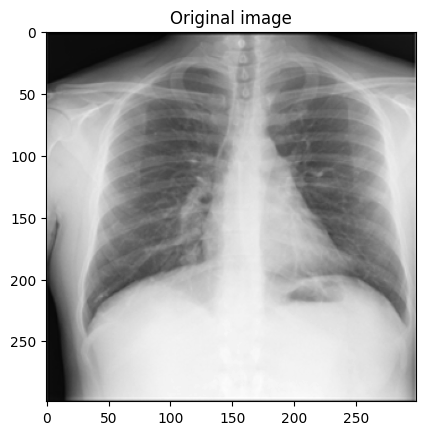

In [97]:
#predictions

# for covid image :
path = "/content/drive/MyDrive/Colab Notebooks/COVID-19_Radiography_Dataset/COVID/images/COVID-1003.png"

image_prediction_and_visualization(path)

1/1 [==============================] - 1s 1s/step
The given X-Ray image is of type = Covid

1/1 [==============================] - 1s 979ms/step
The chances of image being Covid is : 99.99024868011475 %
1/1 [==============================] - 1s 1s/step
The chances of image being Normal is : 0.0035984281566925347 %

image with heatmap representing the covid spot


<ipython-input-94-56e15eb10eb0>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


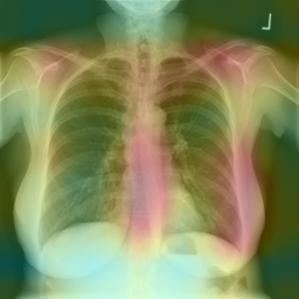


the original input image



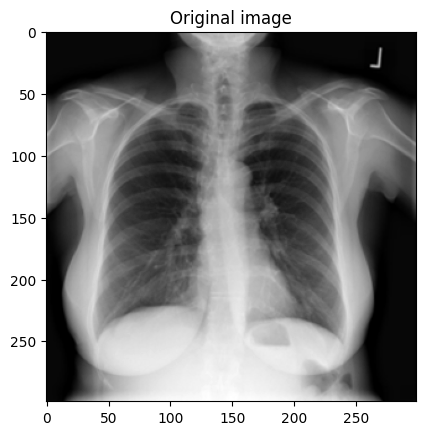

In [98]:
# for normal image :
path = "/content/drive/MyDrive/Colab Notebooks/COVID-19_Radiography_Dataset/Normal/images/Normal-10002.png"

image_prediction_and_visualization(path)

1/1 [==============================] - 1s 1s/step
The given X-Ray image is of type = Covid

1/1 [==============================] - 1s 1s/step
The chances of image being Covid is : 99.79804754257202 %
1/1 [==============================] - 1s 1s/step
The chances of image being Normal is : 0.048239060561172664 %

image with heatmap representing the covid spot


<ipython-input-94-56e15eb10eb0>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


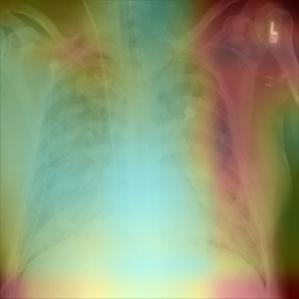


the original input image



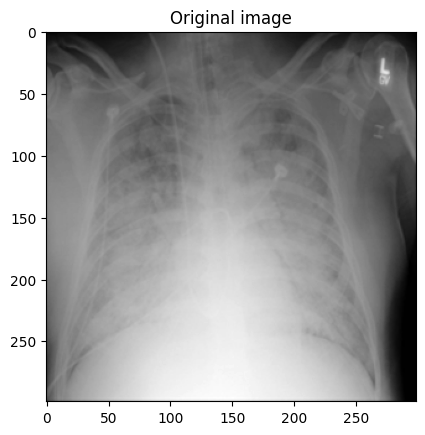

In [99]:
# for Lung_Opacity image :
path = "/content/drive/MyDrive/Colab Notebooks/COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-1003.png"

image_prediction_and_visualization(path)

1/1 [==============================] - 0s 496ms/step
The given X-Ray image is of type = Covid

1/1 [==============================] - 1s 511ms/step
The chances of image being Covid is : 99.99244213104248 %
1/1 [==============================] - 1s 607ms/step
The chances of image being Normal is : 0.00196933324332349 %

image with heatmap representing the covid spot


<ipython-input-94-56e15eb10eb0>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


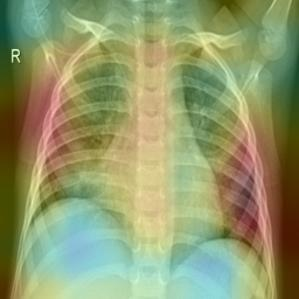


the original input image



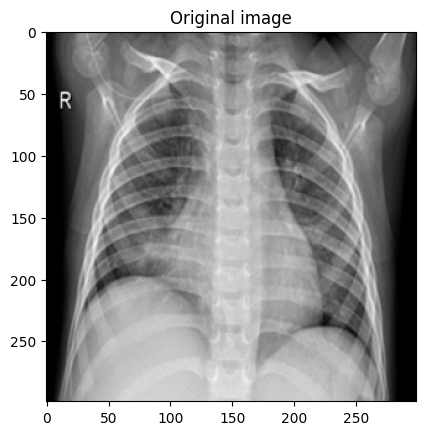

In [100]:
# for Viral Pneumonia image :
path = "/content/drive/MyDrive/Colab Notebooks/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-1003.png"

image_prediction_and_visualization(path)

In [105]:
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()


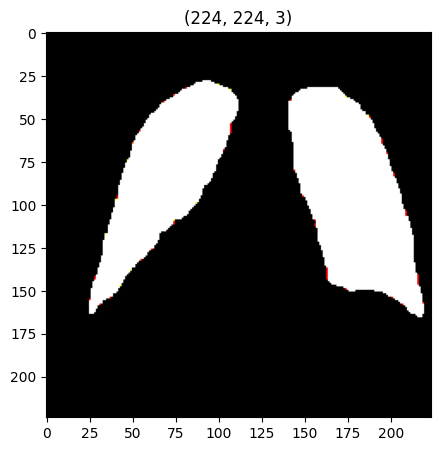

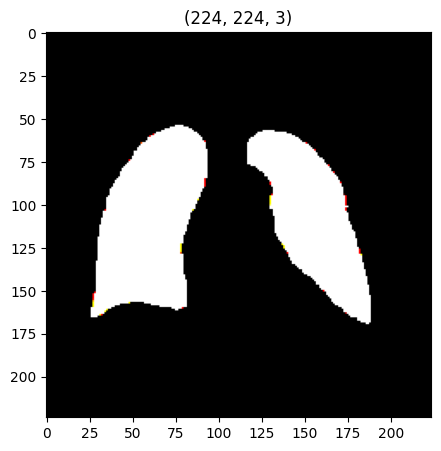

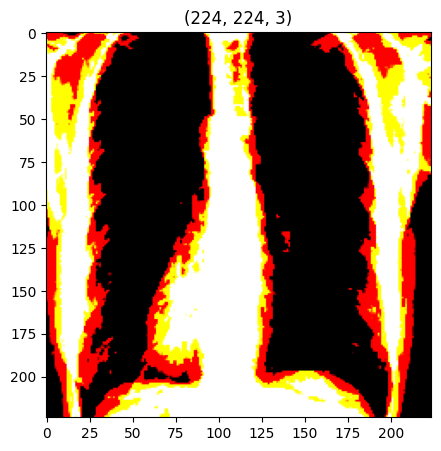

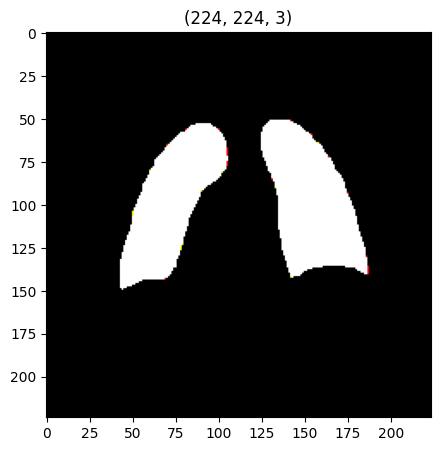

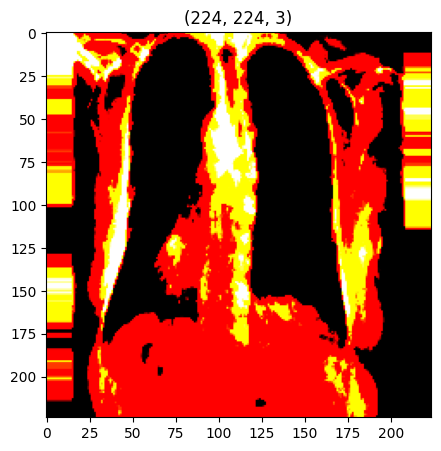

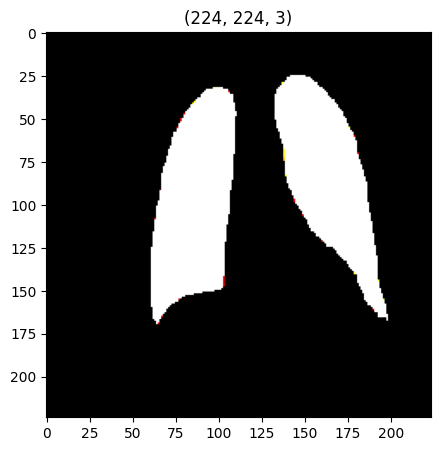

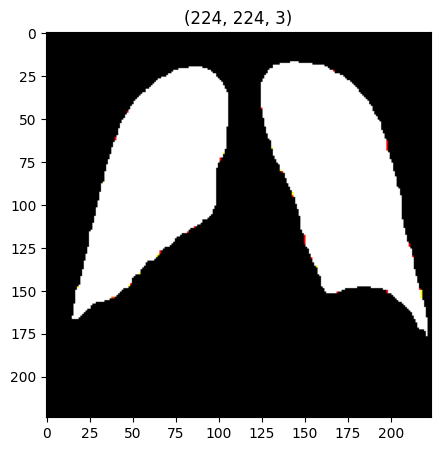

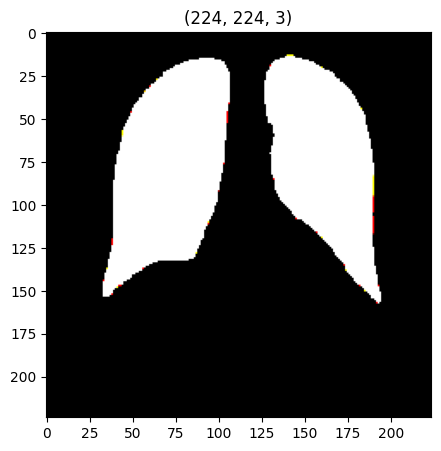

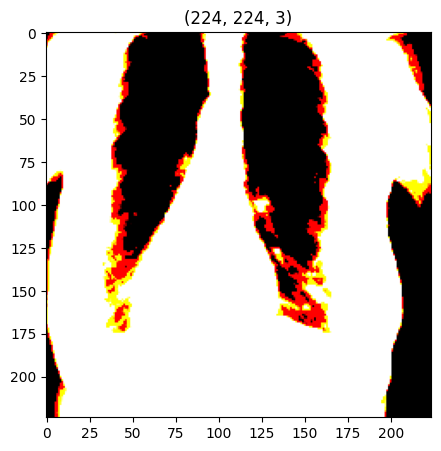

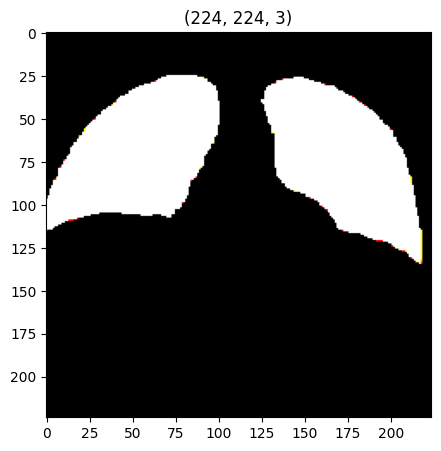

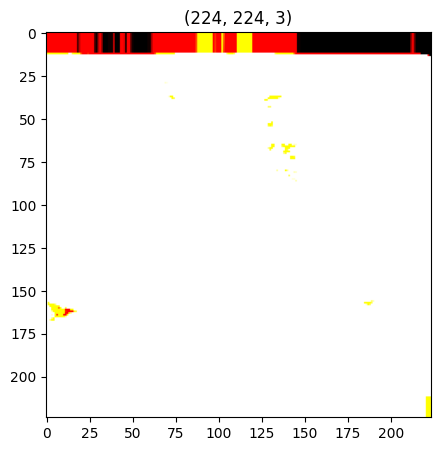

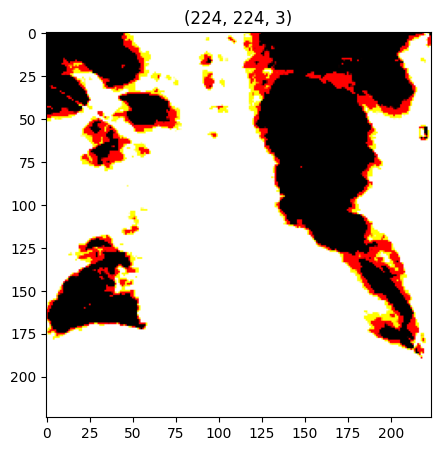

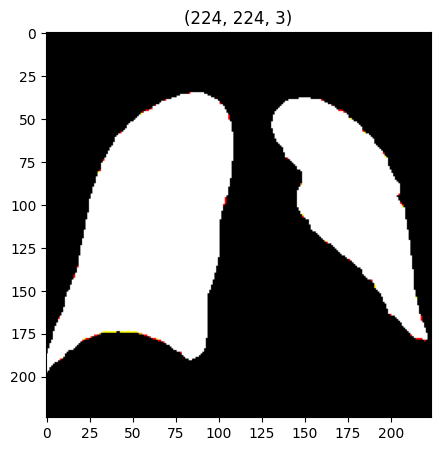

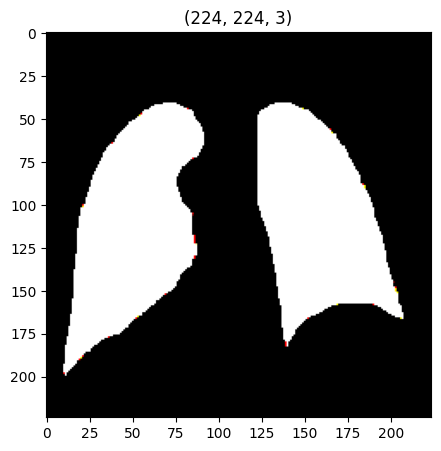

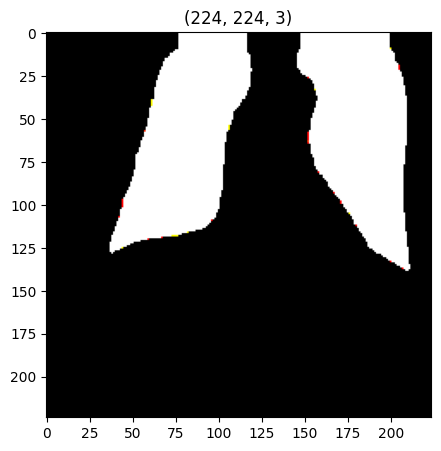

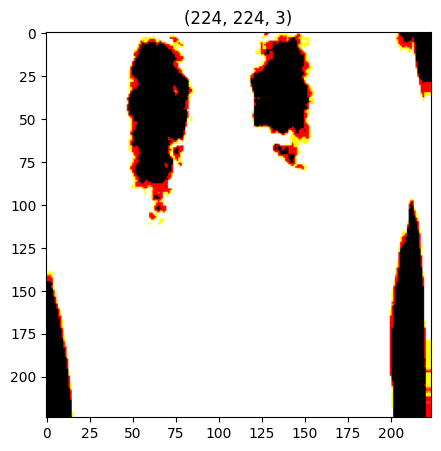

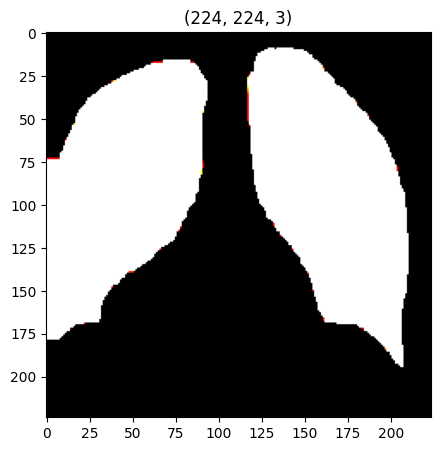

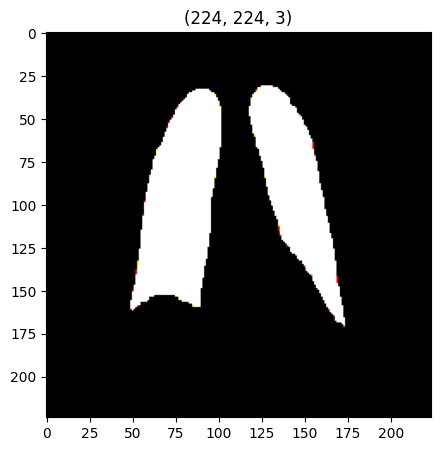

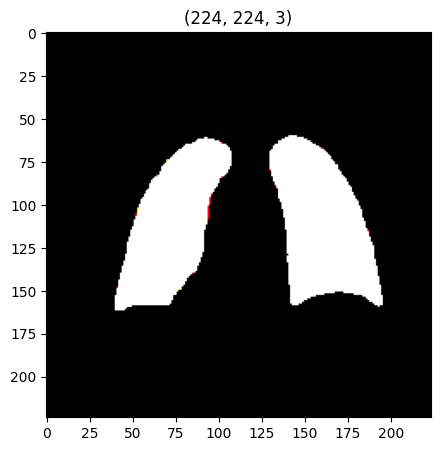

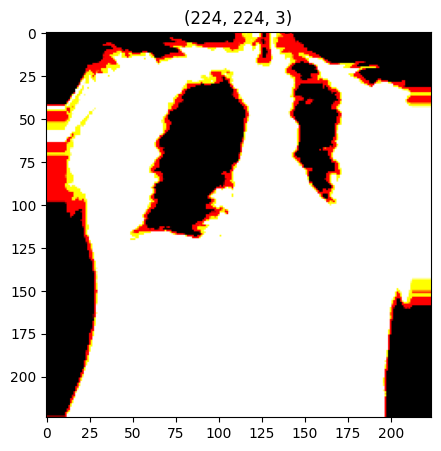

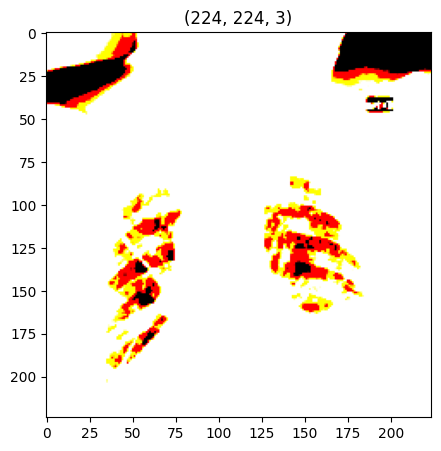

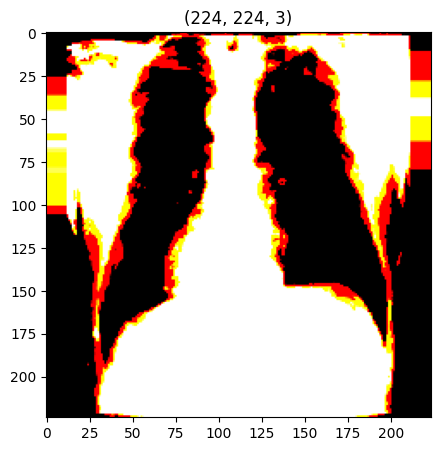

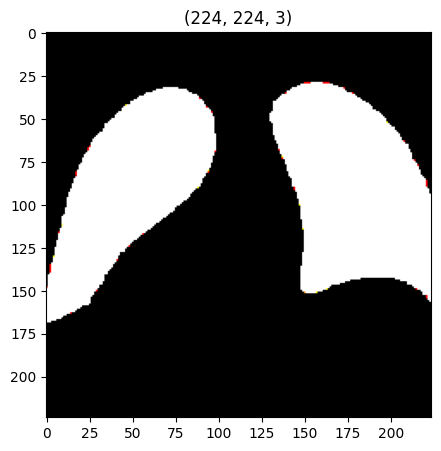

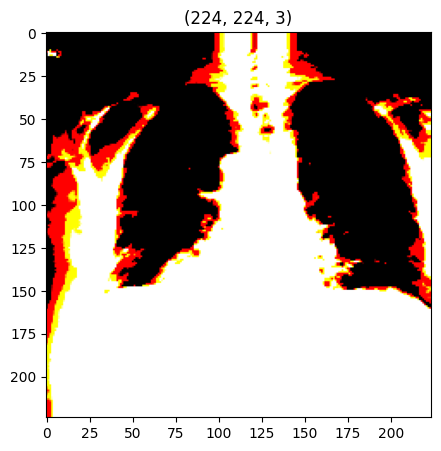

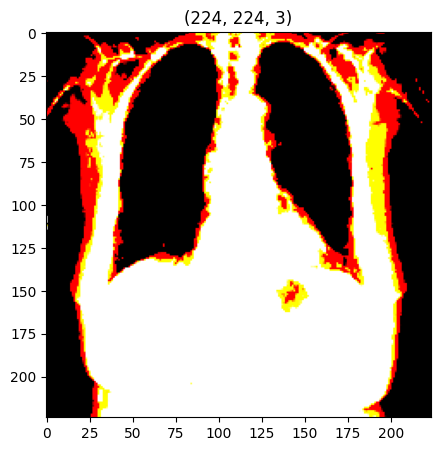

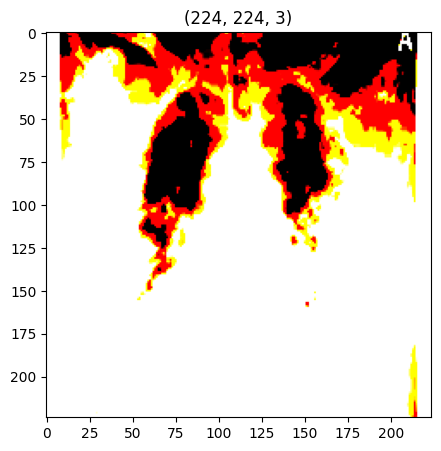

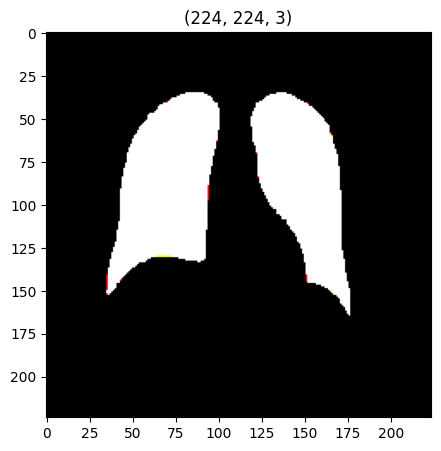

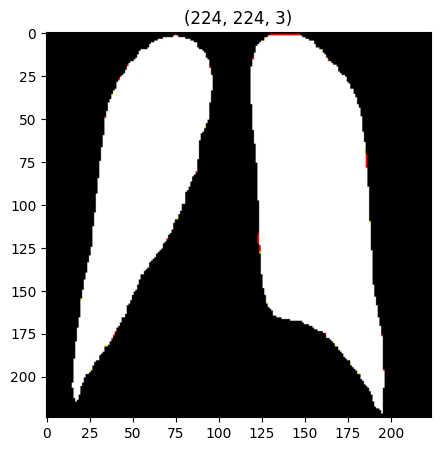

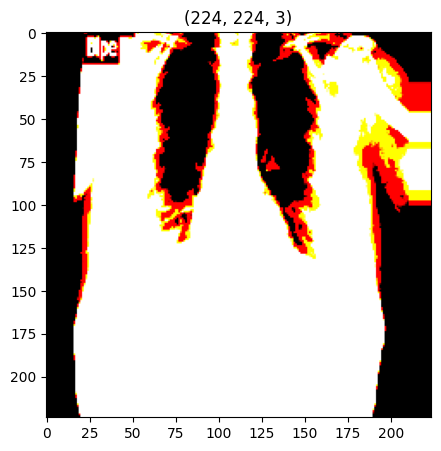

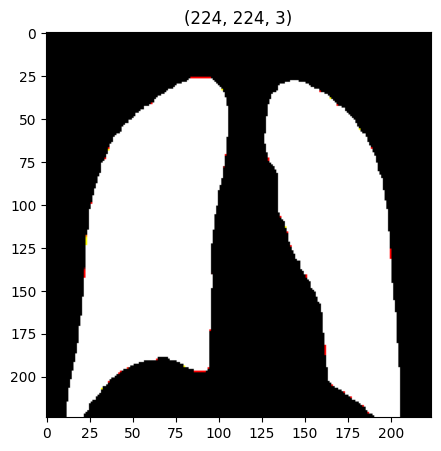

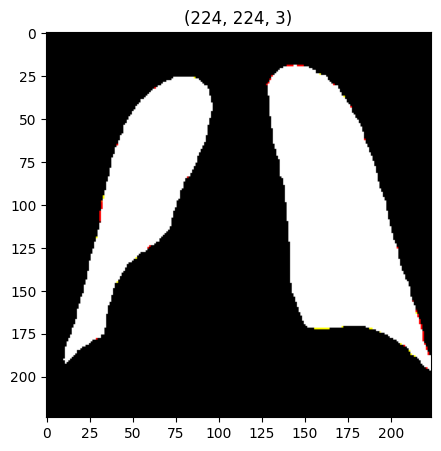

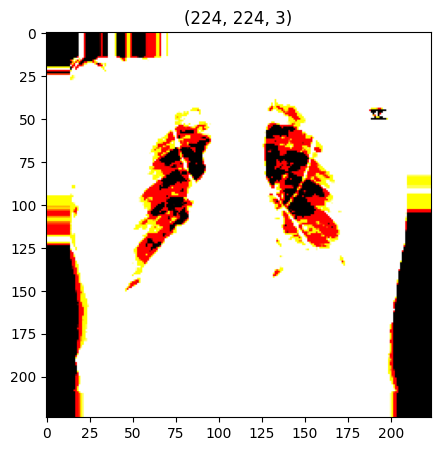

In [106]:
plotImages(t_img, label)

In [112]:
import matplotlib.cm as cm

from IPython.display import Image, display

In [118]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     